In [6]:
import numpy as np
import warnings

import pandas as pd
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score

import docx2txt
import spacy
import re
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

warnings.filterwarnings("ignore")


In [7]:
# Pre-Processing

df = pd.read_csv("Company.csv")
df = df.iloc[:, 1:]

df.head(100)

print(df.isnull().sum().sum())
df.dropna(inplace=True)

dupp = df[df.duplicated(keep=False)].shape[0]

df.head(100)

55


,Company Real or Fake(1 or 0),LinkedIn Followers > 1000,Profile Picture,Responsive Website,Staff Count > 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations,Risk level
0,0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
2,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
4,0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
96,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
97,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
98,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0


In [8]:

Ros = df['Risk level']

s = df['Risk level'].value_counts().rename_axis('Risk level').rename('count')  # if x- and y-labels are important

X = df.iloc[:, :-1].values
# Now let's tell the dataframe which column we want for the target/labels.  
y = df['Risk level']

df.corr()

,Company Real or Fake(1 or 0),LinkedIn Followers > 1000,Profile Picture,Responsive Website,Staff Count > 1000,Staff Premium Accounts,Summary Section,Verified Address,Published Articles,Requests Sensitive Info,Legitimate Email,LinkedIn Recommendations,Risk level
Company Real or Fake(1 or 0),1.000000,0.875072,-0.091317,-0.002483,0.785997,0.755515,0.250549,0.691242,0.716969,0.284857,0.111196,0.726819,-0.920106
LinkedIn Followers > 1000,0.875072,1.000000,-0.006570,0.054126,0.793578,0.747374,0.313334,0.668927,0.709564,0.244319,0.202202,0.735220,-0.861561
Profile Picture,-0.091317,-0.006570,1.000000,0.686001,0.014142,0.144507,0.572614,0.245497,0.349873,0.104754,0.491095,0.314095,-0.020213
Responsive Website,-0.002483,0.054126,0.686001,1.000000,0.031208,0.134388,0.543781,0.256828,0.361358,0.174628,0.494023,0.325424,-0.073946
Staff Count > 1000,0.785997,0.793578,0.014142,0.031208,1.000000,0.699216,0.349048,0.665292,0.670761,0.206682,0.233445,0.670236,-0.779804
Staff Premium Accounts,0.755515,0.747374,0.144507,0.134388,0.699216,1.000000,0.344035,0.677769,0.759675,0.161851,0.279734,0.756686,-0.709762
Summary Section,0.250549,0.313334,0.572614,0.543781,0.349048,0.344035,1.000000,0.386925,0.491999,0.142574,0.401582,0.469189,-0.384346
Verified Address,0.691242,0.668927,0.245497,0.256828,0.665292,0.677769,0.386925,1.000000,0.701321,0.300090,0.335953,0.719912,-0.647593
Published Articles,0.716969,0.709564,0.349873,0.361358,0.670761,0.759675,0.491999,0.701321,1.000000,0.220766,0.347506,0.854075,-0.674993
Requests Sensitive Info,0.284857,0.244319,0.104754,0.174628,0.206682,0.161851,0.142574,0.300090,0.220766,1.000000,0.091544,0.268085,-0.271972


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

KNN_model.fit(X_train, y_train)

SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
logi = classifier.predict(X_test)


----------SVM confusion matrix-----
[[147   0   0   0   0   0]
 [  0   4   0   3   0   2]
 [  0   0   0   4   0   0]
 [  0   0   0  51   0   1]
 [  0   0   0   6   0   2]
 [  0   0   0   1   0  14]]
SVM Accuracy: 0.9191489361702128
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       147
     class 1       1.00      0.44      0.62         9
     class 2       0.00      0.00      0.00         4
     class 3       0.78      0.98      0.87        52
     class 4       0.00      0.00      0.00         8
     class 5       0.74      0.93      0.82        15

    accuracy                           0.92       235
   macro avg       0.59      0.56      0.55       235
weighted avg       0.88      0.92      0.89       235

0.8936170212765957
0.9063829787234042
The risk label is : 3.0
Accuracy: 0.8936170212765957


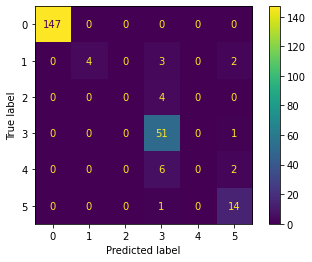

In [10]:
# SVM Method
print("----------SVM confusion matrix-----")
cmd = confusion_matrix(y_test, SVC_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd, display_labels=['0', '1', '2', '3', '4', '5'])
print("SVM Accuracy:", accuracy_score(y_test, SVC_prediction))
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
cmd.plot()
print(classification_report(y_test, SVC_prediction, target_names=target_names))

y_prob = KNN_model.predict_proba(X_test)
y_prob_logi = KNN_model.predict_proba(X_test)
print(accuracy_score(y_test, KNN_prediction))
print(accuracy_score(y_test, logi))

print("The risk label is :", KNN_prediction[3])

print("Accuracy:", accuracy_score(y_test, KNN_prediction))

gnb = GaussianNB()

In [11]:
# Train the classifier:
model = gnb.fit(X_train, y_train)
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf_predict = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, clf_predict))

oversample_ = SMOTE()

X_over, y_over = oversample_.fit_resample(X, y)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.3, random_state=27)

SVC_model = SVC()

Accuracy: 0.9234042553191489


In [12]:
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
Tree_model = tree.DecisionTreeClassifier()

In [13]:
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model_over = KNeighborsClassifier(n_neighbors=5)

KNN_model_over.fit(X_train_o, y_train_o)
SVC_model.fit(X_train_o, y_train_o)
SVC_prediction = SVC_model.predict(X_test_o)
Tree_model.fit(X_train_o, y_train_o)
tree_prediction = Tree_model.predict(X_test_o)

KNN_predictions = KNN_model_over.predict(X_test_o)
print(accuracy_score(y_test_o, KNN_predictions))
print(accuracy_score(y_test_o, SVC_prediction))
print(accuracy_score(y_test_o, tree_prediction))

svc_over = SVC_model.predict(X_test)
print(accuracy_score(y_test, svc_over))

print("----------KNN confusion matrix-----")
cmd_ = confusion_matrix(y_test_o, KNN_predictions)

print(cmd)

0.8779395296752519
0.8790593505039194
0.93505039193729
0.9063829787234042
----------KNN confusion matrix-----


KNN Accuracy: 0.8779395296752519
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99       166
     class 1       0.89      0.86      0.87       146
     class 2       0.95      0.99      0.97       140
     class 3       0.92      0.70      0.80       152
     class 4       0.66      0.92      0.77       142
     class 5       0.92      0.82      0.87       147

    accuracy                           0.88       893
   macro avg       0.89      0.88      0.88       893
weighted avg       0.89      0.88      0.88       893

----------KNN confusion matrix-----


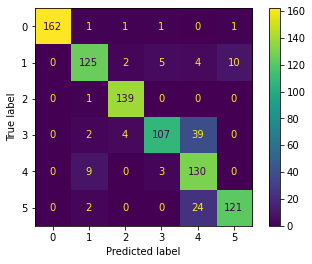

In [14]:
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0', '1', '2', '3', '4', '5'])
print("KNN Accuracy:", accuracy_score(y_test_o, KNN_predictions))
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
cmd.plot()
print(classification_report(y_test_o, KNN_predictions, target_names=target_names))

print("----------KNN confusion matrix-----")
cmd_ = confusion_matrix(y_test_o, SVC_prediction)

print(cmd)

SVM Accuracy: 0.8790593505039194
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       166
     class 1       0.93      0.77      0.85       146
     class 2       0.96      0.94      0.95       140
     class 3       0.88      0.70      0.78       152
     class 4       0.74      0.86      0.79       142
     class 5       0.80      0.99      0.88       147

    accuracy                           0.88       893
   macro avg       0.88      0.88      0.88       893
weighted avg       0.89      0.88      0.88       893

----------KNN confusion matrix-----


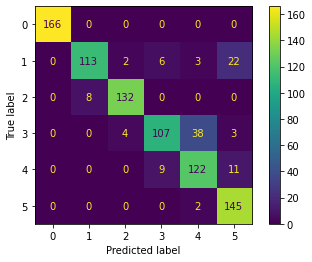

In [15]:
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0', '1', '2', '3', '4', '5'])
print("SVM Accuracy:", accuracy_score(y_test_o, SVC_prediction))
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
cmd.plot()
print(classification_report(y_test_o, SVC_prediction, target_names=target_names))

print("----------KNN confusion matrix-----")
cmd_ = confusion_matrix(y_test_o, tree_prediction)

print(cmd)


KNN Accuracy: 0.93505039193729
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       166
     class 1       0.94      0.94      0.94       146
     class 2       0.97      0.99      0.98       140
     class 3       0.83      0.92      0.88       152
     class 4       0.96      0.77      0.85       142
     class 5       0.92      0.98      0.95       147

    accuracy                           0.94       893
   macro avg       0.94      0.93      0.93       893
weighted avg       0.94      0.94      0.93       893

KNN-Cross-validation scores: [0.83221477 0.8907563  0.75966387 0.91596639 0.92605042]
SVM scores: [0.86912752 0.8789916  0.87731092 0.87394958 0.88067227]
Decision Tree: [0.92114094 0.93109244 0.92436975 0.91428571 0.9394958 ]


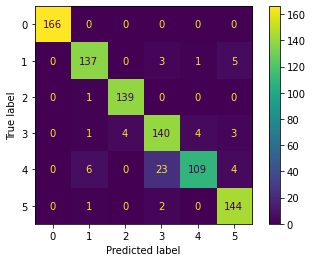

In [16]:
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0', '1', '2', '3', '4', '5'])
print("KNN Accuracy:", accuracy_score(y_test_o, tree_prediction))
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
cmd.plot()
print(classification_report(y_test_o, tree_prediction, target_names=target_names))

# K-Fold Cross Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(KNN_model, X_over, y_over, cv=kfold)
scores_svm = cross_val_score(SVC_model, X_over, y_over, cv=kfold)
scores_clf = cross_val_score(Tree_model, X_over, y_over, cv=kfold)
# Print the cross-validation scores
print('KNN-Cross-validation scores: {}'.format(scores))
print('SVM scores: {}'.format(scores_svm))
print('Decision Tree: {}'.format(scores_clf))

55
----------SVM confusion matrix-----
[[147   0   0   0   0   0]
 [  0   4   0   3   0   2]
 [  0   0   0   4   0   0]
 [  0   0   0  51   0   1]
 [  0   0   0   6   0   2]
 [  0   0   0   1   0  14]]
SVM Accuracy: 0.9191489361702128
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       147
     class 1       1.00      0.44      0.62         9
     class 2       0.00      0.00      0.00         4
     class 3       0.78      0.98      0.87        52
     class 4       0.00      0.00      0.00         8
     class 5       0.74      0.93      0.82        15

    accuracy                           0.92       235
   macro avg       0.59      0.56      0.55       235
weighted avg       0.88      0.92      0.89       235

0.8936170212765957
0.9063829787234042
The risk label is : 3.0
Accuracy: 0.8936170212765957
Accuracy: 0.9234042553191489
0.9059350503919373
0.8812989921612542
0.9328107502799552
0.9063829787234042
----------KNN confusion ma

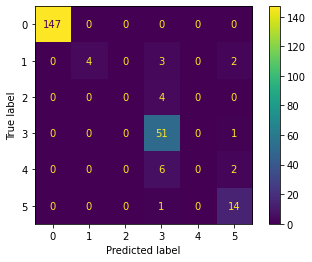

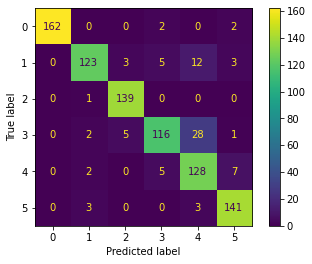

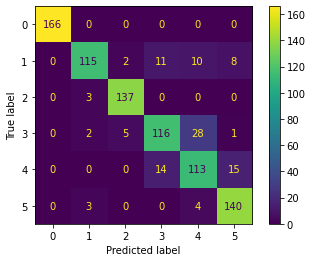

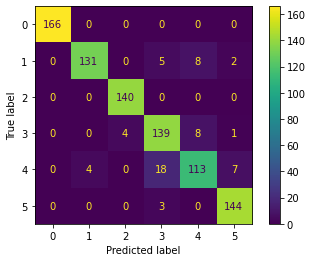

In [65]:
import numpy as np
import warnings

import pandas as pd
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score

import docx2txt
import spacy
import re
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

warnings.filterwarnings("ignore")

# Pre-Processing

df = pd.read_csv("Company.csv")
df = df.iloc[:, 1:]

df.head(100)

print(df.isnull().sum().sum())
df.dropna(inplace=True)

dupp = df[df.duplicated(keep=False)].shape[0]

df.head(100)

Ros = df['Risk level']

s = df['Risk level'].value_counts().rename_axis('Risk level').rename('count')  # if x- and y-labels are important

X = df.iloc[:, :-1].values
# Now let's tell the dataframe which column we want for the target/labels.  
y = df['Risk level']

df.corr()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

KNN_model.fit(X_train, y_train)

SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
logi = classifier.predict(X_test)

# SVM Method
print("----------SVM confusion matrix-----")
cmd = confusion_matrix(y_test, SVC_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd, display_labels=['0', '1', '2', '3', '4', '5'])
print("SVM Accuracy:", accuracy_score(y_test, SVC_prediction))
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
cmd.plot()
print(classification_report(y_test, SVC_prediction, target_names=target_names))

y_prob = KNN_model.predict_proba(X_test)
y_prob_logi = KNN_model.predict_proba(X_test)
print(accuracy_score(y_test, KNN_prediction))
print(accuracy_score(y_test, logi))

print("The risk label is :", KNN_prediction[3])

print("Accuracy:", accuracy_score(y_test, KNN_prediction))

gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_train, y_train)
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf_predict = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, clf_predict))

oversample_ = SMOTE()

X_over, y_over = oversample_.fit_resample(X, y)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.3, random_state=27)

SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
Tree_model = tree.DecisionTreeClassifier()

# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model_over = KNeighborsClassifier(n_neighbors=5)

KNN_model_over.fit(X_train_o, y_train_o)
SVC_model.fit(X_train_o, y_train_o)
SVC_prediction = SVC_model.predict(X_test_o)
Tree_model.fit(X_train_o, y_train_o)
tree_prediction = Tree_model.predict(X_test_o)

KNN_predictions = KNN_model_over.predict(X_test_o)
print(accuracy_score(y_test_o, KNN_predictions))
print(accuracy_score(y_test_o, SVC_prediction))
print(accuracy_score(y_test_o, tree_prediction))

svc_over = SVC_model.predict(X_test)
print(accuracy_score(y_test, svc_over))

print("----------KNN confusion matrix-----")
cmd_ = confusion_matrix(y_test_o, KNN_predictions)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0', '1', '2', '3', '4', '5'])
print("KNN Accuracy:", accuracy_score(y_test_o, KNN_predictions))
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
cmd.plot()
print(classification_report(y_test_o, KNN_predictions, target_names=target_names))

print("----------KNN confusion matrix-----")
cmd_ = confusion_matrix(y_test_o, SVC_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0', '1', '2', '3', '4', '5'])
print("SVM Accuracy:", accuracy_score(y_test_o, SVC_prediction))
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
cmd.plot()
print(classification_report(y_test_o, SVC_prediction, target_names=target_names))

print("----------KNN confusion matrix-----")
cmd_ = confusion_matrix(y_test_o, tree_prediction)

print(cmd)
cmd = ConfusionMatrixDisplay(cmd_, display_labels=['0', '1', '2', '3', '4', '5'])
print("KNN Accuracy:", accuracy_score(y_test_o, tree_prediction))
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
cmd.plot()
print(classification_report(y_test_o, tree_prediction, target_names=target_names))

# K-Fold Cross Validation

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(KNN_model, X_over, y_over, cv=kfold)
scores_svm = cross_val_score(SVC_model, X_over, y_over, cv=kfold)
scores_clf = cross_val_score(Tree_model, X_over, y_over, cv=kfold)
# Print the cross-validation scores
print('KNN-Cross-validation scores: {}'.format(scores))
print('SVM scores: {}'.format(scores_svm))
print('Decision Tree: {}'.format(scores_clf))

phone_number_regex = r"\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}"
address_regex = "^(\\d{1,}) [a-zA-Z0-9\\s]+(\\,)? [a-zA-Z]+(\\,)? [A-Z]{2} [0-9]{5,6}$"


####################################################################
print("\n\nResume Scraper\n\n")


def txt_input(docx):
    txt = docx2txt.process(docx)
    if txt:
        return txt.replace('\t', ' ')
    return None


def find_text(resume, headers):
    # Define a list of possible section footers
    footers = ['Education', 'Skills', 'Projects', 'Experiences', 'Certificate']
    # Loop over the possible headers and find the first occurrence in the text
    for header in headers:
        match = re.search(rf"\b{header}\b", resume)
        if match:
            for footer in footers:
                if footer == header:
                    continue
                f_match = re.search(rf"\b{footer}\b", resume[match.start():])
                if f_match:
                    return match.start() + len(header), f_match.start() + match.start()
            return match.start() + len(header), len(resume)

    # If no header is found, return None
    return None


def generatorCV(risk, name, address, phone, email, education, skill, project, experience, certificate):
    doc = Document()
    doc.add_heading(name, level=1).style.font.size = Pt(20)

    info = doc.add_paragraph()
    info.add_run(address + '\n')
    info.add_run(phone + '\n')
    info.add_run(email + '\n')

    education = education.replace("\n\n", "\n").strip()
    doc.add_heading("EDUCATION", level=1)
    educationCV = doc.add_paragraph()
    educationCV.add_run(education)

    skill = skill.replace("\n\n", "\n").strip()
    doc.add_heading("SKILLS", level=1)
    skillCV = doc.add_paragraph()
    skillCV.add_run(skill)

    project = project.replace("\n\n", "\n").strip()
    doc.add_heading("PROJECTS", level=1)
    projectCV = doc.add_paragraph()
    projectCV.add_run(project)

    experience = experience.replace("\n\n", "\n").strip()
    doc.add_heading("EXPERIENCES", level=1)
    experienceCV = doc.add_paragraph()
    experienceCV.add_run(experience)

    certificate = certificate.replace("\n\n", "\n").strip()
    doc.add_heading("CERTIFICATES", level=1)
    certificateCV = doc.add_paragraph()
    certificateCV.add_run(certificate)

    if risk != 0:
        note = doc.add_paragraph("\n\n\nThis resume is being protected by applicant's preferences")
        note.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
        note.style.font.size = Pt(9)
        note.bold = True
    doc.save('risk_' + str(risk) + '_resume.docx')


def main(risk):
    resume_text = txt_input('F:/Data Privacy/Implemenattion/Hrudaya.docx')

    nlp = spacy.load('en_core_web_sm')
    doc = nlp(resume_text)

    address = education = project = experience = skill = certificate = ""

    # This is to locate address
    lines = resume_text.splitlines()
    for line in lines:
        newline = line.splitlines()
        # Remove 'Address: '
        for i in range(len(newline)):
            newline[i] = newline[i].split(' ', 1)[-1]

        # join lines back into a single string
        new_text = '\n'.join(newline)
        matches = re.match(address_regex, new_text)
        if matches:
            # print(matches.group(0))
            address = matches.group(0)

    # This is to locate phone number
    phone = re.findall(phone_number_regex, resume_text)

    # Locate name and email address
    name = doc.ents[0] if doc.ents else ''
    name = name.text.rstrip()
    email = [token.text for token in doc if token.like_email][0] if any(token.like_email for token in doc) else ''

    # Find Education field
    education_start, education_end = find_text(resume_text, ['Education'])
    if education_start is not None:
        education = resume_text[education_start:education_end]
        education = education.rstrip()
    else:
        print("Experience section not found")

    # Find Skill Section
    skill_start, skill_end = find_text(resume_text, ['Skills'])
    if skill_start is not None:
        skill = resume_text[skill_start:skill_end]
        skill = skill.rstrip()
    else:
        print("Skill section not found")

    # Find Project Section
    project_start, project_end = find_text(resume_text, ['Projects'])
    if project_start is not None:
        project = resume_text[project_start:project_end]
        project = project.rstrip()
    else:
        print("Project section not found")

    # Find Experience Section
    experience_start, experience_end = find_text(resume_text, ['Experiences'])
    if experience_start is not None:
        experience = resume_text[experience_start:experience_end]
        experience = experience.rstrip()
    else:
        print("Experience section not found")

    # Find Certificate Section
    certificate_start, certificate_end = find_text(resume_text, ['Certificate'])
    if certificate_start is not None:
        certificate = resume_text[certificate_start:certificate_end]
        certificate = certificate.rstrip()
    else:
        print("Certificate section not found")

    # Masking information
    at_index = email.index("@")
    email_covered = "*" * at_index + email[at_index:]

    phone_covered = phone[0][:-4] + "****"

    comma_index = address.index(",")
    address_covered = "*" * comma_index + address[comma_index:]

    education_covered = education.splitlines()
    for i in range(len(education_covered)):
        for school in ["University", "College"]:
            if school in education_covered[i]:
                education_covered[i] = school + " of " + "".join(["*" for _ in education_covered[i]])
    education_covered = "\n".join(education_covered)

    experience_covered = experience.splitlines()
    for i in range(len(experience_covered)):
        if "-" in experience_covered[i]:
            dash_index = experience_covered[i].index("-")
            experience_covered[i] = experience_covered[i][:dash_index] + "*" * (len(experience_covered[i]) - dash_index)
        else:
            continue
    experience_covered = "\n".join(experience_covered)

    project_covered = project.splitlines()
    for i in range(len(project_covered)):
        if "-" in project_covered[i]:
            dash_index = project_covered[i].index("-")
            project_covered[i] = project_covered[i][:dash_index] + "*" * (len(project_covered[i]) - dash_index)
        else:
            continue
    project_covered = "\n".join(project_covered)

    # Generate CV
    risk = int(risk)
    if risk == 0:
        generatorCV(risk, name, address, phone[0], email,
                    education, skill, project, experience, certificate)
    elif risk == 1:
        generatorCV(risk, name, address_covered, phone[0], email,
                    education, skill, project, experience, certificate)
    elif risk == 2:
        generatorCV(risk, name, address_covered, phone_covered, email,
                    education, skill, project, experience, certificate)
    elif risk == 3:
        generatorCV(risk, name, address_covered, phone_covered, email_covered,
                    education, skill, project, experience, certificate)
    elif risk == 4:
        generatorCV(risk, name, address_covered, phone_covered, email_covered,
                    education_covered, skill, project, experience, certificate)
    elif risk == 5:
        generatorCV(risk, name, address_covered, phone_covered, email_covered,
                    education_covered, skill, project_covered, experience_covered, certificate)


A = np.array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]])
# using inputs to predict the output
prediction = KNN_model_over.predict(A)
print("Company A risk level: {}".format(prediction[0]))

riskLevel = prediction[0]
main(riskLevel)


B = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
# using inputs to predict the output
prediction = KNN_model_over.predict(B)
print("Company B risk level: {}".format(prediction[0]))

riskLevel = prediction[0]
main(riskLevel)
